In [1]:
import pandas as pd
from PIL import Image
from IPython.display import display

In [ ]:
preds_df = pd.read_csv("../results/raw_gender_ViT-L-14_laion2b_s32b_b82k_val.csv")
ff_root = "/home/lucasmc/Documents/ufrgs/data/datasets/FairFace"

In [3]:
preds_df

,file,age,gender,race,gender_preds
0,val/1.jpg,3-9,Male,East Asian,Male
1,val/2.jpg,50-59,Female,East Asian,Female
2,val/3.jpg,30-39,Male,White,Male
3,val/4.jpg,20-29,Female,Latino_Hispanic,Female
4,val/5.jpg,20-29,Male,Southeast Asian,Male
...,...,...,...,...,...
10949,val/10950.jpg,30-39,Male,White,Male
10950,val/10951.jpg,50-59,Male,White,Male
10951,val/10952.jpg,60-69,Male,Latino_Hispanic,Male
10952,val/10953.jpg,20-29,Female,East Asian,Female


In [4]:
errors_df = preds_df[preds_df['gender'] != preds_df['gender_preds']]

In [5]:
errors_df

,file,age,gender,race,gender_preds
51,val/52.jpg,3-9,Male,Middle Eastern,Female
61,val/62.jpg,3-9,Male,Southeast Asian,Female
103,val/104.jpg,10-19,Male,Indian,Female
105,val/106.jpg,20-29,Female,Black,Male
121,val/122.jpg,20-29,Male,Black,Female
...,...,...,...,...,...
10831,val/10832.jpg,30-39,Male,Indian,Female
10855,val/10856.jpg,0-2,Male,White,Female
10862,val/10863.jpg,60-69,Male,White,Female
10916,val/10917.jpg,3-9,Male,White,Female


In [6]:
errors = len(errors_df)
total = len(preds_df)
correct = total - errors
print(f"Accuracy: {correct / total}")

Accuracy: 0.9469600146065364


In [7]:
black_errors = errors_df[errors_df['race'] == 'Black']

In [8]:
black_files = list(black_errors['file'])

In [9]:
baby_errors = black_errors[black_errors['age'] == '0-2']
child_errors = black_errors[black_errors['age'] == '3-9']
kid_errors = black_errors[black_errors['age'] == '10-19']

young_errors = len(baby_errors) + len(child_errors) + len(kid_errors)
young_errors

104

In [10]:
len(black_errors)

160

In [11]:
black_iter = iter(black_files)

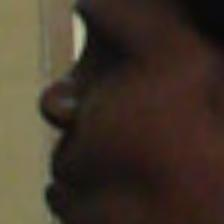

Gender: 3093    Female
Name: gender, dtype: object
Predicted: 3093    Male
Name: gender_preds, dtype: object
Age: 3093    30-39
Name: age, dtype: object


In [20]:
# file = next(black_iter)
file = "val/3094.jpg"
img_path = f"{ff_root}/{file}"
img = Image.open(img_path)
display(img)
print(f"Gender: {black_errors[black_errors['file'] == file].gender}")
print(f"Predicted: {black_errors[black_errors['file'] == file].gender_preds}")
print(f"Age: {black_errors[black_errors['file'] == file].age}")